In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

df = pd.read_csv('Phenotypic_V1_0b_preprocessed1.csv')

#cnr: CONTRAST TO NOISE RATIO, EFC:Overview of extension, SNR: Signal to Noise Ratio, 
#qi1: model-free quality index, fwhm:Full Width at Half Maximum, fber:fiber-track

In [2]:
df.head()

,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
0,1,50002,1,50002,PITT,no_filename,1,10.201539,1.194664,16.223458,3.878000,0.152711,12.072452
1,2,50003,2,50003,PITT,Pitt_0050003,1,7.165701,1.126752,10.460008,4.282238,0.161716,9.241155
2,3,50004,3,50004,PITT,Pitt_0050004,1,7.698144,1.226218,9.725750,3.881684,0.174186,9.323463
3,4,50005,4,50005,PITT,Pitt_0050005,1,9.071807,1.256278,11.198226,3.628667,0.119269,10.814200
4,5,50006,5,50006,PITT,Pitt_0050006,1,8.026798,1.407166,6.282055,3.674539,0.130647,10.123574


In [3]:
df.drop(df.columns[[0,1,2,3,4,5,6]],axis=1,inplace=True)
df.head()

,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
0,10.201539,1.194664,16.223458,3.878000,0.152711,12.072452
1,7.165701,1.126752,10.460008,4.282238,0.161716,9.241155
2,7.698144,1.226218,9.725750,3.881684,0.174186,9.323463
3,9.071807,1.256278,11.198226,3.628667,0.119269,10.814200
4,8.026798,1.407166,6.282055,3.674539,0.130647,10.123574


In [4]:
#dropping null values
df=df.dropna()


In [5]:
#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Number of null values:
anat_cnr     0
anat_efc     0
anat_fber    0
anat_fwhm    0
anat_qi1     0
anat_snr     0
dtype: int64


In [6]:
X_features = np.load("features.npz")['a']
y_target = np.load("labels.npz")['a']
y_target = np.select([y_target == 1, y_target == 2], [0, 1], y_target)
df.describe()

,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000
mean,11.641527,2.079628,72.804971,3.558793,0.072209,48.185793
std,5.612932,11.435278,155.033640,0.676312,0.052283,282.736653
min,0.000015,-217.560433,-3.123743,2.533930,0.000451,0.001400
25%,8.613273,0.755764,3.898699,3.088846,0.040015,12.262756
50%,10.966648,1.675090,10.341742,3.401205,0.060916,15.601842
75%,13.181021,3.197335,86.028008,3.831771,0.093534,21.528386
max,51.691800,33.318370,1734.146859,5.938324,0.259048,5957.198529


In [7]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

anat_cnr : [10.20153877  7.16570147  7.69814438 ...  3.41346894  7.83900677
 12.16929687]
anat_efc : [1.19466382 1.12675161 1.22621772 ... 1.35823764 1.75436261 2.81835195]
anat_fber : [16.22345825 10.4600076   9.72575046 ...  4.33569983 12.27005481
  9.27210712]
anat_fwhm : [3.8780004  4.28223801 3.88168429 ... 3.32455    3.23217    3.51019   ]
anat_qi1 : [0.15271098 0.16171559 0.17418572 ... 0.10948991 0.08396437 0.04430978]
anat_snr : [12.07245188  9.24115456  9.32346277 ...  4.93395956 16.4031739
 23.56598215]


In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_features, y_target, test_size=0.20, random_state = 42, shuffle = True, # shuffle dataset
stratify = y_target)

In [9]:
model=DecisionTreeClassifier(criterion="entropy", random_state= 42, splitter='best', max_depth=5, min_samples_leaf= 75)
model.fit(Xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=75,
                       random_state=42)

In [10]:
y_pred = model.predict(Xtest)

In [11]:
print("Train Accuracy:",model.score(Xtrain, ytrain))
print("Test Accuracy:", model.score(Xtest, ytest))

Train Accuracy: 0.6451149425287356
Test Accuracy: 0.6057142857142858


In [12]:
#***no need to run this***

# to find the value for max depth
from sklearn import metrics
test_accuracies = []

for i in range(1, 15, 1):
  dec_tree = DecisionTreeClassifier(max_depth =i, criterion='entropy', random_state=42)
  dec_tree.fit(Xtrain, ytrain)   
  dec_tree_train_score = dec_tree.score(Xtrain,ytrain)*100
  print(f"Training Accuracy for Decision tree with max_depth {i} = {round(dec_tree_train_score, 2)} %")
  y_pred_rf = dec_tree.predict(Xtest)
  dec_tree  = (metrics.accuracy_score(ytest, y_pred_rf)*100)
  print(f"Testing Accuracy for Decision tree with max_depth {i} = {round(dec_tree, 2)} %")
  test_accuracies.append(round(dec_tree , 2)) ##

print(f"test accuracies found = {test_accuracies}")
best_accuracy = max(test_accuracies)
print(f"higest test accuracy for DT = {best_accuracy} and it is for max_depth = {test_accuracies.index(max(test_accuracies))+1}")

Training Accuracy for Decision tree with max_depth 1 = 62.21 %
Testing Accuracy for Decision tree with max_depth 1 = 52.57 %
Training Accuracy for Decision tree with max_depth 2 = 64.8 %
Testing Accuracy for Decision tree with max_depth 2 = 54.29 %
Training Accuracy for Decision tree with max_depth 3 = 68.25 %
Testing Accuracy for Decision tree with max_depth 3 = 53.14 %
Training Accuracy for Decision tree with max_depth 4 = 74.57 %
Testing Accuracy for Decision tree with max_depth 4 = 57.14 %
Training Accuracy for Decision tree with max_depth 5 = 77.87 %
Testing Accuracy for Decision tree with max_depth 5 = 60.0 %
Training Accuracy for Decision tree with max_depth 6 = 84.91 %
Testing Accuracy for Decision tree with max_depth 6 = 53.71 %
Training Accuracy for Decision tree with max_depth 7 = 90.66 %
Testing Accuracy for Decision tree with max_depth 7 = 58.86 %
Training Accuracy for Decision tree with max_depth 8 = 95.11 %
Testing Accuracy for Decision tree with max_depth 8 = 57.14 %
Tr

In [13]:
#***no need to run this***

# to find the value for min_samples_leaf


for i in range(1, 100, 1):
  dec_tree = DecisionTreeClassifier(min_samples_leaf=i, criterion='entropy', random_state=42)
  dec_tree.fit(Xtrain, ytrain)   
  dec_tree_train_score = dec_tree.score(Xtrain,ytrain)*100
  print(f"Training Accuracy for Decision tree with min_samples_leaf {i} = {round(dec_tree_train_score, 2)} %")
  y_pred_rf = dec_tree.predict(Xtest)
  dec_tree  = (metrics.accuracy_score(ytest, y_pred_rf)*100)
  print(f"Testing Accuracy for Decision tree with min_samples_leaf {i} = {round(dec_tree, 2)} %")
  test_accuracies.append(round(dec_tree , 2))

print(f"test accuracies found = {test_accuracies}")
best_accuracy = max(test_accuracies)
print(f"higest test accuracy for DT = {best_accuracy} and it is for min_samples_leaf = {test_accuracies.index(max(test_accuracies))+1}")

Training Accuracy for Decision tree with min_samples_leaf 1 = 100.0 %
Testing Accuracy for Decision tree with min_samples_leaf 1 = 57.71 %
Training Accuracy for Decision tree with min_samples_leaf 2 = 98.85 %
Testing Accuracy for Decision tree with min_samples_leaf 2 = 58.29 %
Training Accuracy for Decision tree with min_samples_leaf 3 = 97.84 %
Testing Accuracy for Decision tree with min_samples_leaf 3 = 58.29 %
Training Accuracy for Decision tree with min_samples_leaf 4 = 96.41 %
Testing Accuracy for Decision tree with min_samples_leaf 4 = 56.0 %
Training Accuracy for Decision tree with min_samples_leaf 5 = 95.11 %
Testing Accuracy for Decision tree with min_samples_leaf 5 = 58.29 %
Training Accuracy for Decision tree with min_samples_leaf 6 = 94.11 %
Testing Accuracy for Decision tree with min_samples_leaf 6 = 56.57 %
Training Accuracy for Decision tree with min_samples_leaf 7 = 93.82 %
Testing Accuracy for Decision tree with min_samples_leaf 7 = 56.57 %
Training Accuracy for Decisi

Training Accuracy for Decision tree with min_samples_leaf 60 = 70.11 %
Testing Accuracy for Decision tree with min_samples_leaf 60 = 54.29 %
Training Accuracy for Decision tree with min_samples_leaf 61 = 69.97 %
Testing Accuracy for Decision tree with min_samples_leaf 61 = 54.29 %
Training Accuracy for Decision tree with min_samples_leaf 62 = 69.97 %
Testing Accuracy for Decision tree with min_samples_leaf 62 = 57.14 %
Training Accuracy for Decision tree with min_samples_leaf 63 = 67.96 %
Testing Accuracy for Decision tree with min_samples_leaf 63 = 59.43 %
Training Accuracy for Decision tree with min_samples_leaf 64 = 67.96 %
Testing Accuracy for Decision tree with min_samples_leaf 64 = 59.43 %
Training Accuracy for Decision tree with min_samples_leaf 65 = 67.96 %
Testing Accuracy for Decision tree with min_samples_leaf 65 = 59.43 %
Training Accuracy for Decision tree with min_samples_leaf 66 = 67.96 %
Testing Accuracy for Decision tree with min_samples_leaf 66 = 59.43 %
Training Accu

In [14]:
#***no need to run this***

# to find the value for min_samples_split

for i in range(2, 100, 1):
  dec_tree = DecisionTreeClassifier(min_samples_split=i, criterion='entropy', random_state=42, max_depth = 5,min_samples_leaf =54 )
  dec_tree.fit(Xtrain, ytrain)   
  dec_tree_train_score = dec_tree.score(Xtrain,ytrain)*100
  print(f"Training Accuracy for Decision tree with min_samples_split {i} = {round(dec_tree_train_score, 2)} %")
  y_pred_rf = dec_tree.predict(Xtest)
  dec_tree  = (metrics.accuracy_score(ytest, y_pred_rf)*100)
  print(f"Testing Accuracy for Decision tree with min_samples_split {i} = {round(dec_tree, 2)} %")
  test_accuracies.append(round(dec_tree , 2))

print(f"test accuracies found = {test_accuracies}")
best_accuracy = max(test_accuracies)
print(f"higest test accuracy for DT = {best_accuracy} and it is for min_samples_split = {test_accuracies.index(max(test_accuracies))+1}")

Training Accuracy for Decisiion tree with min_samples_split 2 = 71.41 %
Testing Accuracy for Decisiion tree with min_samples_split 2 = 60.57 %
Training Accuracy for Decisiion tree with min_samples_split 3 = 71.41 %
Testing Accuracy for Decisiion tree with min_samples_split 3 = 60.57 %
Training Accuracy for Decisiion tree with min_samples_split 4 = 71.41 %
Testing Accuracy for Decisiion tree with min_samples_split 4 = 60.57 %
Training Accuracy for Decisiion tree with min_samples_split 5 = 71.41 %
Testing Accuracy for Decisiion tree with min_samples_split 5 = 60.57 %
Training Accuracy for Decisiion tree with min_samples_split 6 = 71.41 %
Testing Accuracy for Decisiion tree with min_samples_split 6 = 60.57 %
Training Accuracy for Decisiion tree with min_samples_split 7 = 71.41 %
Testing Accuracy for Decisiion tree with min_samples_split 7 = 60.57 %
Training Accuracy for Decisiion tree with min_samples_split 8 = 71.41 %
Testing Accuracy for Decisiion tree with min_samples_split 8 = 60.57 %

Training Accuracy for Decisiion tree with min_samples_split 59 = 71.41 %
Testing Accuracy for Decisiion tree with min_samples_split 59 = 60.57 %
Training Accuracy for Decisiion tree with min_samples_split 60 = 71.41 %
Testing Accuracy for Decisiion tree with min_samples_split 60 = 60.57 %
Training Accuracy for Decisiion tree with min_samples_split 61 = 71.41 %
Testing Accuracy for Decisiion tree with min_samples_split 61 = 60.57 %
Training Accuracy for Decisiion tree with min_samples_split 62 = 71.41 %
Testing Accuracy for Decisiion tree with min_samples_split 62 = 60.57 %
Training Accuracy for Decisiion tree with min_samples_split 63 = 71.41 %
Testing Accuracy for Decisiion tree with min_samples_split 63 = 60.57 %
Training Accuracy for Decisiion tree with min_samples_split 64 = 71.41 %
Testing Accuracy for Decisiion tree with min_samples_split 64 = 60.57 %
Training Accuracy for Decisiion tree with min_samples_split 65 = 71.41 %
Testing Accuracy for Decisiion tree with min_samples_spli

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


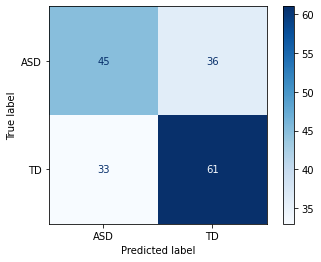

In [15]:
plot_confusion_matrix(model,
                      Xtest,
                      ytest,
                      values_format='d',
                      display_labels=["ASD","TD"], cmap="Blues")

In [16]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

print(metrics.classification_report(ytest, model.predict(Xtest)))

print(accuracy_score(ytest, model.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57        81
           1       0.63      0.65      0.64        94

    accuracy                           0.61       175
   macro avg       0.60      0.60      0.60       175
weighted avg       0.60      0.61      0.61       175

0.6057142857142858


In [17]:
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut 

k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, Xtest, ytest, cv = k_folds) 
print("Average CV Score: ", scores.mean())

Average CV Score:  0.4514285714285714


In [18]:
loo = LeaveOneOut()
scores = cross_val_score(model, Xtest, ytest, cv = loo)
print("Average CV Score using LOO: ", scores.mean())

Average CV Score using LOO:  0.3485714285714286


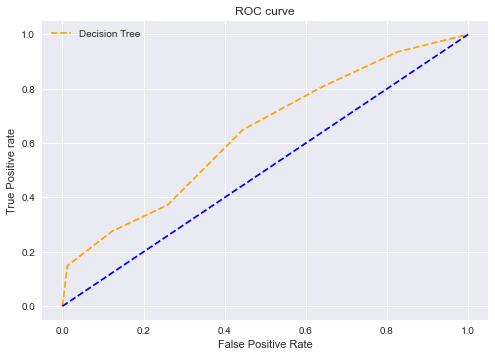

In [19]:
# predict probabilities
pred_prob = model.predict_proba(Xtest)
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(ytest, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();